In [1]:
import pandas as pd
import sqlite3
import sqlalchemy 
import os
import matplotlib.pyplot as plt

In [2]:

try:
    conn = sqlite3.connect("FVS_Outputs3.db")    
except Exception as e:
    print(e)

#Now in order to read in pandas dataframe we need to know table name
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")


cases = pd.read_sql_query('SELECT * FROM FVS_Cases', conn)
carbon = pd.read_sql_query('SELECT * FROM FVS_Carbon', conn)
fuels = pd.read_sql_query('SELECT * FROM FVS_Fuels', conn)
summary = pd.read_sql_query('SELECT * FROM FVS_Summary2_East', conn)
FVS_Hrv_Carbon = pd.read_sql_query('SELECT * FROM FVS_Hrv_Carbon', conn)

conn.close()

Table Name : [('FVS_Cases',), ('FVS_Fuels',), ('FVS_Carbon',), ('FVS_Hrv_Carbon',), ('FVS_Summary2_East',)]


In [3]:
summary['StandID'].unique()

array(['Base_HL', 'Base_BK', 'Base_BK-WN', 'Base_AB', 'Base_LP',
       'Base_RO', 'Base_WN', 'HD_HL', 'HD_BK', 'HD_BK-WN', 'HD_AB',
       'HD_LP', 'HD_RO', 'HD_WN', 'HI_VAR1', 'HI_VAR2', 'HI_VAR3',
       'LD_HL', 'LD_BK', 'LD_BK-WN', 'LD_AB', 'LD_LP', 'LD_RO', 'LD_WN'],
      dtype=object)

In [4]:
carbon_df = pd.merge(carbon,cases, on = "CaseID", how = "left").drop("StandID_y", axis = 1).rename({"StandID_x": "StandID"}, axis = 1)

In [5]:
results = {}

for stand in carbon_df['StandID'].unique():
    
    sdf = carbon_df[carbon_df['StandID'] == stand]
    
    scen_res= {}
    
    for scenario in sdf['MgmtID'].unique():
        tdf = sdf[sdf['MgmtID'] == scenario]
        csum = tdf['Aboveground_Total_Live'] + tdf['Belowground_Live'] 
        scen_res[scenario] = csum * 0.45 * 44/12 # convert AGB --> CO2
        
    results[stand] = scen_res 


In [6]:
years = carbon_df['Year'].unique()


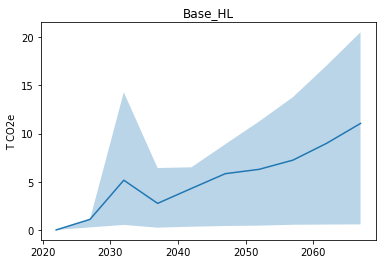

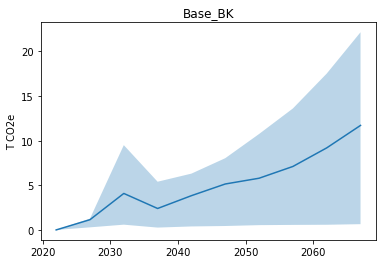

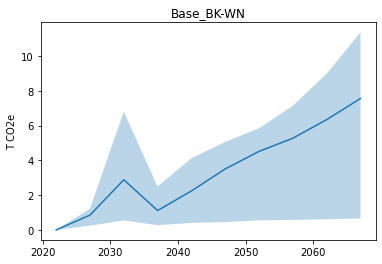

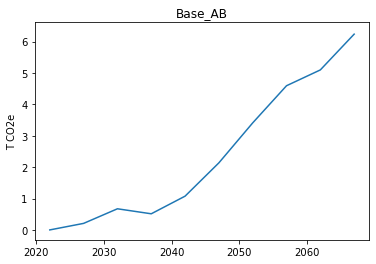

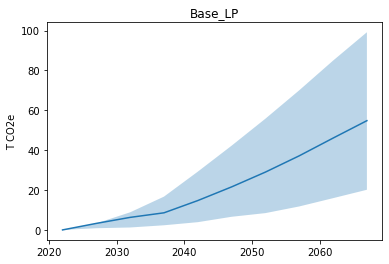

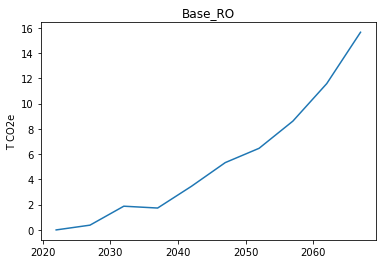

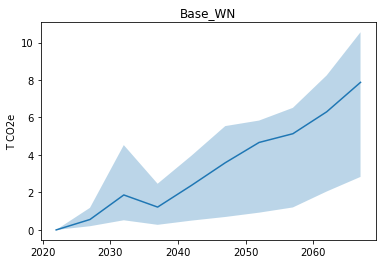

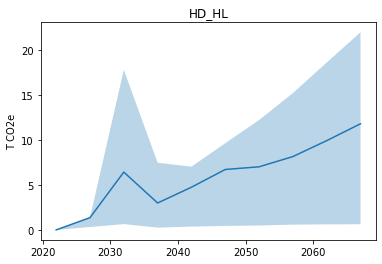

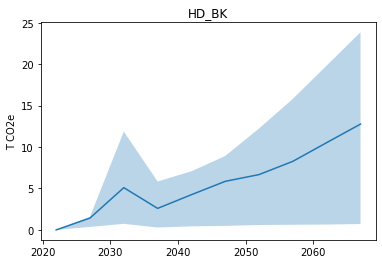

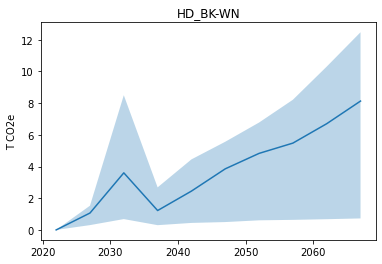

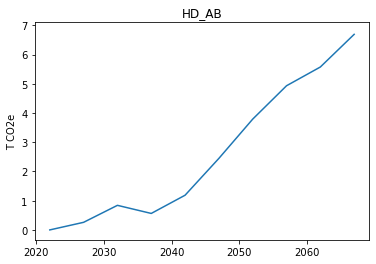

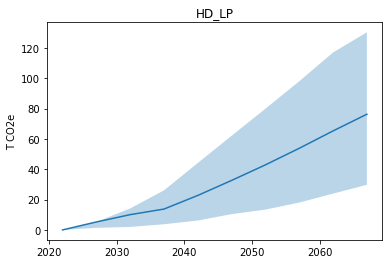

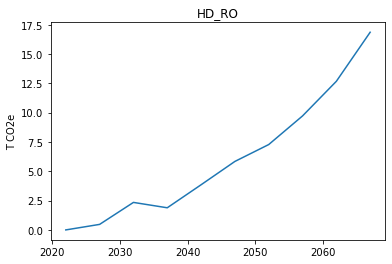

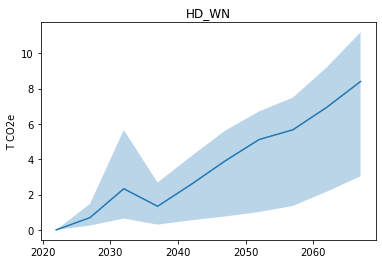

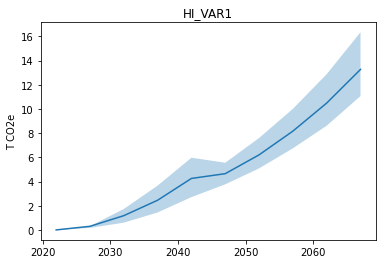

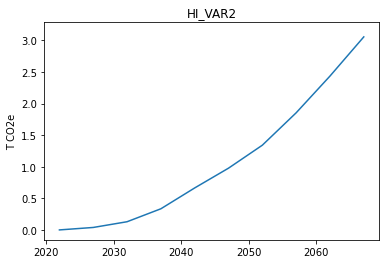

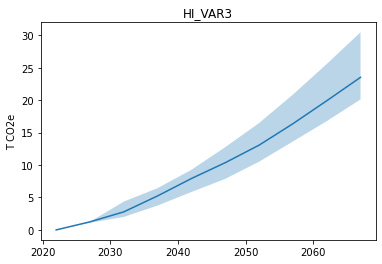

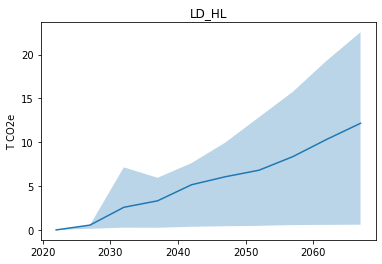

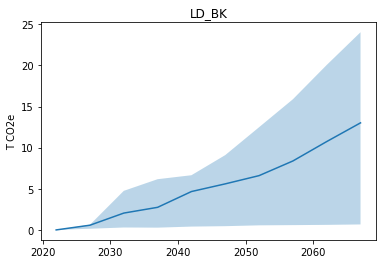

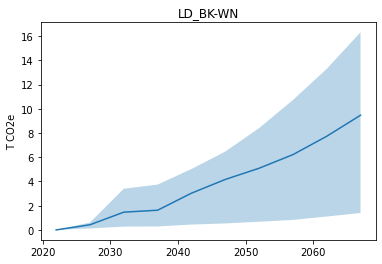

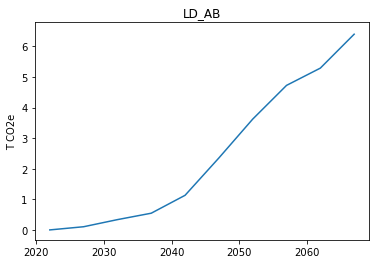

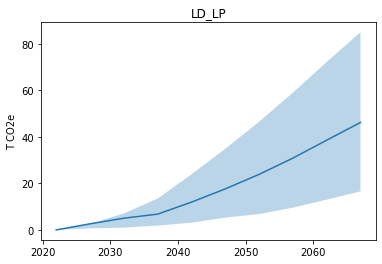

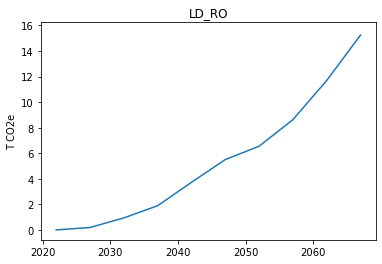

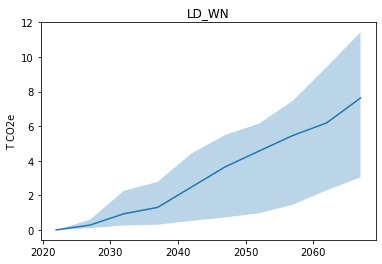

In [7]:
for k,v in results.items():
    
    plt.plot(years, results[k]['defS'])
    plt.title(k)
    plt.fill_between(years,results[k]['LOSI'],results[k]['HISI'], alpha = 0.3)
    plt.ylabel("T CO2e")
    plt.show()

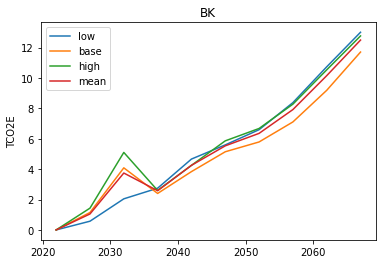

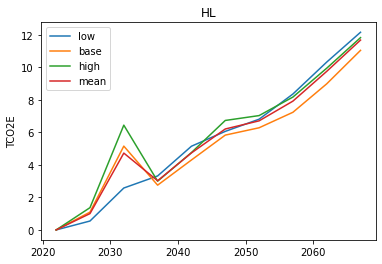

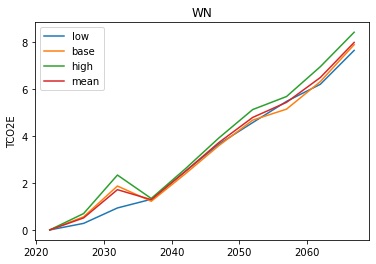

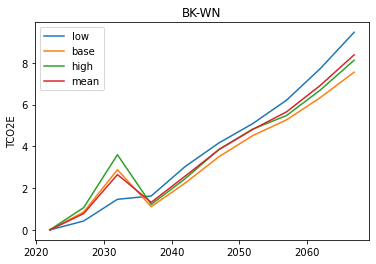

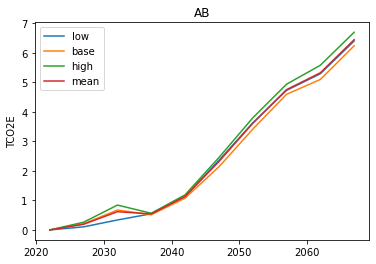

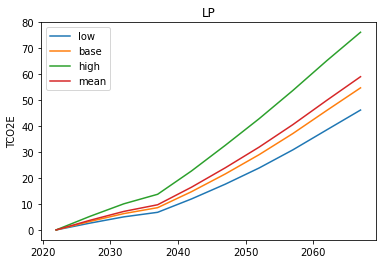

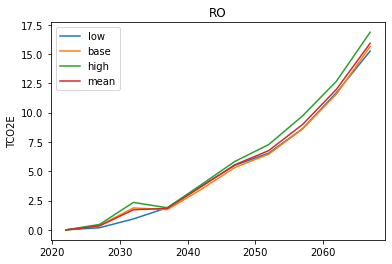

In [8]:
for species in ["BK", "HL", "WN", "BK-WN", "AB", "LP", "RO"]:
    base = "Base_{}".format(species)
    hd = "HD_{}".format(species)
    ld = "LD_{}".format(species)
    
    c1,c2,c3 = [list(results[col]['defS'].reset_index(drop = True)) for col in [ld,base,hd]]
    
    scendf = pd.DataFrame([c1,c2,c3]).T
    scendf['mean'] = scendf.mean(axis = 1)
    scendf.index = years
    scendf.columns = ['low','base','high','mean']

    scendf.plot(title="{}".format(species), ylabel = 'TCO2E')
    
    scendf.to_csv("{}.csv".format(species))

<AxesSubplot:>

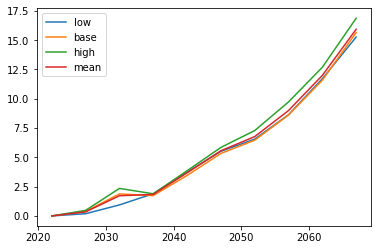

In [9]:
scendf.plot()